# H2O example

This notebook will give an example of how to use `skutil` preprocessors with H2OEstimators and H2OFrames.

In [1]:
from __future__ import print_function, division
import skutil
import sklearn
import h2o
import pandas as pd
import numpy as np

print('Skutil version:  %s' % skutil.__version__)
print('H2O version:     %s' % h2o.__version__)
print('Numpy version:   %s' % np.__version__)
print('Sklearn version: %s' % sklearn.__version__)
print('Pandas version:  %s' % pd.__version__)

Skutil version:  0.0.38
H2O version:     3.8.2.9
Numpy version:   1.11.1
Sklearn version: 0.17.1
Pandas version:  0.18.1


### Initialize H2O

First, we'll start our H2O cluster...

In [3]:
h2o.init(ip='127.0.0.1', port=54321)

H2O cluster uptime:,22 minutes 40 seconds 989 milliseconds
H2O cluster version:,3.8.2.9
H2O cluster name:,H2O_started_from_python_tgsmith_age952
H2O cluster total nodes:,1
H2O cluster total free memory:,1.76 GB
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


### Load data

We'll load sklearn's breast cancer data. Using skutil's `from_pandas` method, we can upload a Pandas frame to the H2O cloud

In [6]:
from sklearn.datasets import load_breast_cancer
from skutil.h2o.util import from_pandas

# import data, load into pandas
bc = load_breast_cancer()
X = pd.DataFrame.from_records(data=bc.data, columns=bc.feature_names)
X['target'] = bc.target

# push to h2o cloud
X = from_pandas(X)
X.head()


Parse Progress: [##################################################] 100%


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0
18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0
13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0


In [7]:
# Here are our feature names:
x = bc.feature_names
y = 'target'

### `skutil.h2o` preprocessing

Skutil provides an `h2o` module which delivers some skutil `feature_selection` classes that can operate on an H2OFrame. Each `BaseH2OTransformer` has the following `__init__` signature:

    BaseH2OTransformer(self, feature_names=None, target_feature=None)
    
The selector will only operate on the `feature_names` (if provided) and will always exclude the `target_feature`.

In [8]:
from skutil.h2o import H2ONearZeroVarianceFilterer

# Let's determine whether we're at risk for any near-zero variance
nzv = H2ONearZeroVarianceFilterer(feature_names=x, target_feature=y, threshold=1e-4)
nzv.fit(X)

# let's see if anything was dropped...
nzv.drop_

['mean fractal dimension',
 'smoothness error',
 'concave points error',
 'symmetry error',
 'fractal dimension error']

In [9]:
from skutil.h2o import H2OMulticollinearityFilterer

# Are we at risk of any multicollinearity?
mcf = H2OMulticollinearityFilterer(feature_names=x, target_feature=y, threshold=0.85)
mcf.fit(X)

# we can look at the dropped features
mcf.correlations_

[Dropped: mean perimeter, Corr_feature: mean radius, abs_corr: 0.98768, MAC: 0.44299,
 Dropped: mean radius, Corr_feature: mean area, abs_corr: 0.92430, MAC: 0.41549,
 Dropped: worst radius, Corr_feature: mean area, abs_corr: 0.86444, MAC: 0.42847,
 Dropped: worst area, Corr_feature: mean area, abs_corr: 0.86092, MAC: 0.41414,
 Dropped: worst perimeter, Corr_feature: mean area, abs_corr: 0.85035, MAC: 0.40810,
 Dropped: perimeter error, Corr_feature: radius error, abs_corr: 0.86796, MAC: 0.39774]

### `skutil.h2o` modeling

Skutil's `h2o` module allows us to form the familiar `Pipeline` objects we're familiar with from sklearn.

In [10]:
from skutil.h2o import H2OPipeline
from h2o.estimators import H2OGradientBoostingEstimator

# first, let's make sure our target is a factor
X[y] = X[y].asfactor()

# let's fit a pipeline with our estimator...
pipe = H2OPipeline([
        ('nzv', H2ONearZeroVarianceFilterer(threshold=1e-4)),
        ('mcf', H2OMulticollinearityFilterer(threshold=0.85)),
        ('gbm', H2OGradientBoostingEstimator(ntrees=100, max_depth=5))
    ], feature_names=x, target_feature=y)

# fit...
pipe.fit(X)


gbm Model Build Progress: [##################################################] 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Method
Model Key:  GBM_model_python_1472162613332_158

Model Summary: 


,number_of_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,100.0,22858.0,5.0,5.0,5.0,11.0,21.0,14.34




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 4.30052877528e-06
R^2: 0.999981603199
LogLoss: 0.000904550820078
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.991380362086: 


,0,1,Error,Rate
0,212.0,0.0,0.0,(0.0/212.0)
1,0.0,357.0,0.0,(0.0/357.0)
Total,212.0,357.0,0.0,(0.0/569.0)



Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9913804,1.0,235.0
max f2,0.9913804,1.0,235.0
max f0point5,0.9913804,1.0,235.0
max accuracy,0.9913804,1.0,235.0
max precision,0.9999623,1.0,0.0
max recall,0.9913804,1.0,235.0
max specificity,0.9999623,1.0,0.0
max absolute_MCC,0.9913804,1.0,235.0
max min_per_class_accuracy,0.9913804,1.0,235.0
max mean_per_class_accuracy,0.9913804,1.0,235.0



Gains/Lift Table: Avg response rate: 62.74 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105448,0.9999292,1.5938375,1.5938375,1.0,1.0,0.0168067,0.0168067,59.3837535,59.3837535
,2,0.0210896,0.9999260,1.5938375,1.5938375,1.0,1.0,0.0168067,0.0336134,59.3837535,59.3837535
,3,0.0316344,0.9999242,1.5938375,1.5938375,1.0,1.0,0.0168067,0.0504202,59.3837535,59.3837535
,4,0.0404218,0.9999224,1.5938375,1.5938375,1.0,1.0,0.0140056,0.0644258,59.3837535,59.3837535
,5,0.0509666,0.9999185,1.5938375,1.5938375,1.0,1.0,0.0168067,0.0812325,59.3837535,59.3837535
,6,0.1001757,0.9999035,1.5938375,1.5938375,1.0,1.0,0.0784314,0.1596639,59.3837535,59.3837535
,7,0.1511424,0.9998905,1.5938375,1.5938375,1.0,1.0,0.0812325,0.2408964,59.3837535,59.3837535
,8,0.2003515,0.9998765,1.5938375,1.5938375,1.0,1.0,0.0784314,0.3193277,59.3837535,59.3837535
,9,0.3005272,0.9998302,1.5938375,1.5938375,1.0,1.0,0.1596639,0.4789916,59.3837535,59.3837535
,10,0.4007030,0.9997156,1.5938375,1.5938375,1.0,1.0,0.1596639,0.6386555,59.3837535,59.3837535




Scoring History: 


,timestamp,duration,number_of_trees,training_MSE,training_logloss,training_AUC,training_lift,training_classification_error
,2016-08-25 17:26:43,0.021 sec,0.0,0.2337650,0.6603163,0.5,1.0,0.3725835
,2016-08-25 17:26:43,0.088 sec,1.0,0.1937925,0.5756179,0.9954746,1.5938375,0.0333919
,2016-08-25 17:26:43,0.112 sec,2.0,0.1618213,0.5078971,0.9958578,1.5938375,0.0333919
,2016-08-25 17:26:43,0.142 sec,3.0,0.1362215,0.4525288,0.9961088,1.5938375,0.0333919
,2016-08-25 17:26:43,0.166 sec,4.0,0.1154403,0.4061016,0.9974830,1.5938375,0.0263620
---,---,---,---,---,---,---,---,---
,2016-08-25 17:26:47,3.883 sec,93.0,0.0000085,0.0013059,1.0,1.5938375,0.0
,2016-08-25 17:26:47,3.929 sec,94.0,0.0000075,0.0012305,1.0,1.5938375,0.0
,2016-08-25 17:26:47,3.970 sec,95.0,0.0000071,0.0011802,1.0,1.5938375,0.0
,2016-08-25 17:26:47,4.013 sec,96.0,0.0000065,0.0011215,1.0,1.5938375,0.0



See the whole table with table.as_data_frame()

Variable Importances: 


variable,relative_importance,scaled_importance,percentage
worst concave points,339.9634094,1.0,0.4903696
mean concave points,174.8574219,0.5143419,0.2522176
mean area,69.1228027,0.2033242,0.0997040
area error,22.9399433,0.0674777,0.0330890
worst texture,22.6568584,0.0666450,0.0326807
mean texture,21.4273739,0.0630285,0.0309072
worst concavity,14.1138000,0.0415156,0.0203580
worst fractal dimension,8.6100378,0.0253264,0.0124193
worst smoothness,5.1607580,0.0151803,0.0074440
compactness error,5.0519552,0.0148603,0.0072870


H2OPipeline(feature_names=array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       ...',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23'),
      steps=[('nzv', H2ONearZeroVarianceFilterer(feature_names=array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error..._warn=True, target_feature='target',
               threshold=0.85, use='complete.obs')), ('gbm', )],
      target_feature='target')

### Hyperparameter optimization

We can use `sklearn`-esque grid searches, which also allow us to search over preprocessor objects

In [16]:
from skutil.h2o import H2ORandomizedSearchCV
from skutil.h2o import H2OKFold
from scipy.stats import uniform, randint

# define our random state
rand_state = 42

# let's redefine our pipeline
pipe = H2OPipeline([
        ('nzv', H2ONearZeroVarianceFilterer()),
        ('mcf', H2OMulticollinearityFilterer()),
        ('gbm', H2OGradientBoostingEstimator(seed=rand_state))
    ])

# our hyperparameters over which to search...
hyper = {
    'nzv__threshold'    : uniform(1e-6,1e-2),
    'mcf__threshold'    : uniform(0.7, 0.29),
    'gbm__ntrees'       : randint(50, 100),
    'gbm__max_depth'    : randint(3, 10),
    'gbm__min_rows'     : randint(5, 50),
    'gbm__learn_rate'   : uniform(0.025, 0.075)
}

# define our grid search
search = H2ORandomizedSearchCV(
        estimator=pipe,
        param_grid=hyper,
        feature_names=x,
        target_feature=y,
        n_iter=5, # keep it small for our demo...
        random_state=rand_state,
        scoring='accuracy_score',
        cv=H2OKFold(n_folds=3, shuffle=True, random_state=rand_state),
        verbose=2
    )

# fit
search.fit(X)

[CV (iter 0, fold 0)] Target: target; gbm__min_rows=25, gbm__ntrees=77, mcf__threshold=0.861308734677, nzv__threshold=0.00963745820847, gbm__max_depth=8, gbm__learn_rate=0.0284011902442 

gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%

[CV (iter 0, fold 0)]  Target: target; gbm__min_rows=25, gbm__ntrees=77, mcf__threshold=0.861308734677, nzv__threshold=0.00963745820847, gbm__max_depth=8, gbm__learn_rate=0.0284011902442 -   3.7s


[CV (iter 0, fold 1)] Target: target; gbm__min_rows=25, gbm__ntrees=77, mcf__threshold=0.861308734677, nzv__threshold=0.00963745820847, gbm__max_depth=8, gbm__learn_rate=0.0284011902442 

gbm Model Build Progress: [##################################################] 100%

gbm prediction Progress: [##################################################] 100%

[CV (iter 0, fold 1)]  Target: target; gbm__min_rows=25, gbm__ntrees=77, mcf__threshold=

H2ORandomizedSearchCV(cv=H2OKFold(n_folds=3, random_state=42, shuffle=True),
           estimator=H2OPipeline(feature_names=None,
      steps=[('nzv', H2ONearZeroVarianceFilterer(feature_names=None, na_rm=False, na_warn=True,
              target_feature=None, threshold=1e-06, use='complete.obs')), ('mcf', H2OMulticollinearityFilterer(feature_names=None, na_rm=False, na_warn=True,
               target_feature=None, threshold=0.85, use='complete.obs')), ('gbm', )],
      target_feature=None),
           feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness e...ompactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'],
           iid=True, n_iter=5, n_jobs=1,
           param_grid={'mcf__threshold': <sci

### Model evaluation

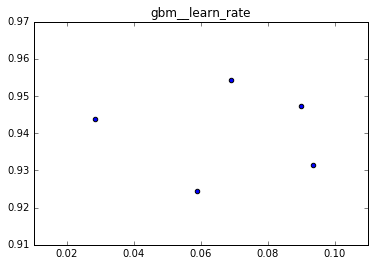

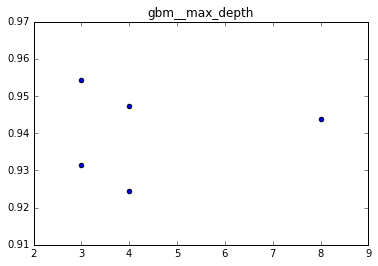

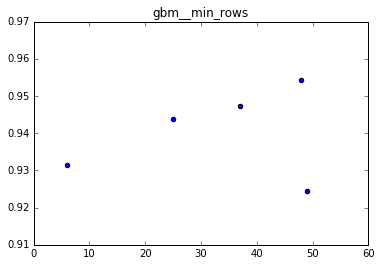

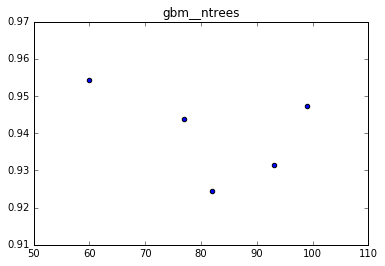

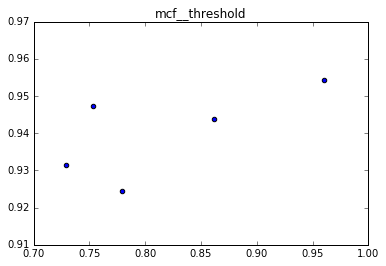

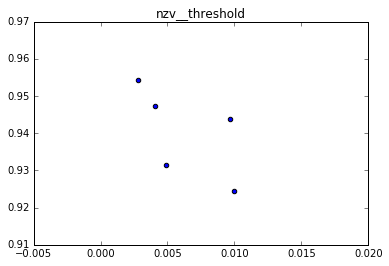

,gbm__learn_rate,gbm__max_depth,gbm__min_rows,gbm__ntrees,mcf__threshold,nzv__threshold,score,std
1,0.068872,3,48,60,0.960508,0.002775,0.954306,0.009983
2,0.089872,4,37,99,0.753287,0.004046,0.947276,0.014383
0,0.028401,8,25,77,0.861309,0.009637,0.943761,0.032271
4,0.093523,3,6,93,0.729273,0.004896,0.931459,0.030789
3,0.058691,4,49,82,0.779441,0.009963,0.924429,0.043715


In [17]:
from skutil.utils import report_grid_score_detail
%matplotlib inline

report_grid_score_detail(search, charts=True, sort_results=True, ascending=False)

So our best estimator achieves a mean accuracy of 95%! We can predict on our best estimator as follows (note it's a bad idea to predict on in-sample data. This is not a ML demo, it's a demo of the API).

In [18]:
search.predict(X).head()


gbm prediction Progress: [##################################################] 100%


predict,p0,p1
0,0.937262,0.0627376
0,0.942317,0.0576834
0,0.984896,0.0151038
0,0.722895,0.277105
0,0.923232,0.0767681
0,0.836642,0.163358
0,0.987562,0.0124378
0,0.954058,0.0459416
0,0.957527,0.0424733
0,0.894437,0.105563
